In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
df = pd.read_excel('player_performance_scaled1.xlsx')
df.head()

,Name,Age,Matches_Played,Goals_Scored,Accuracy,Win_Contribution,Diet_Quality,Practice_Hours,Fitness_Level,Teamwork_Score,Mental_Focus_Score,Injury_Days,Player_Performance
0,Player_1,24,19,23,74.774566,59.511404,9.056060,19.074572,6.623055,9.703317,8.912672,4,53.047363
1,Player_2,32,82,30,84.420120,86.408388,6.730027,18.068067,1.645982,1.465018,3.190570,57,58.048139
2,Player_3,28,33,5,71.741367,47.852420,6.525402,16.490972,7.143555,5.543160,6.016035,44,27.390051
3,Player_4,25,73,1,62.320102,98.189263,1.599868,16.826710,3.177385,7.466086,1.350814,52,49.050015
4,Player_5,24,58,19,90.955116,67.227372,5.665672,14.974774,7.425574,8.763764,7.001627,54,42.368870


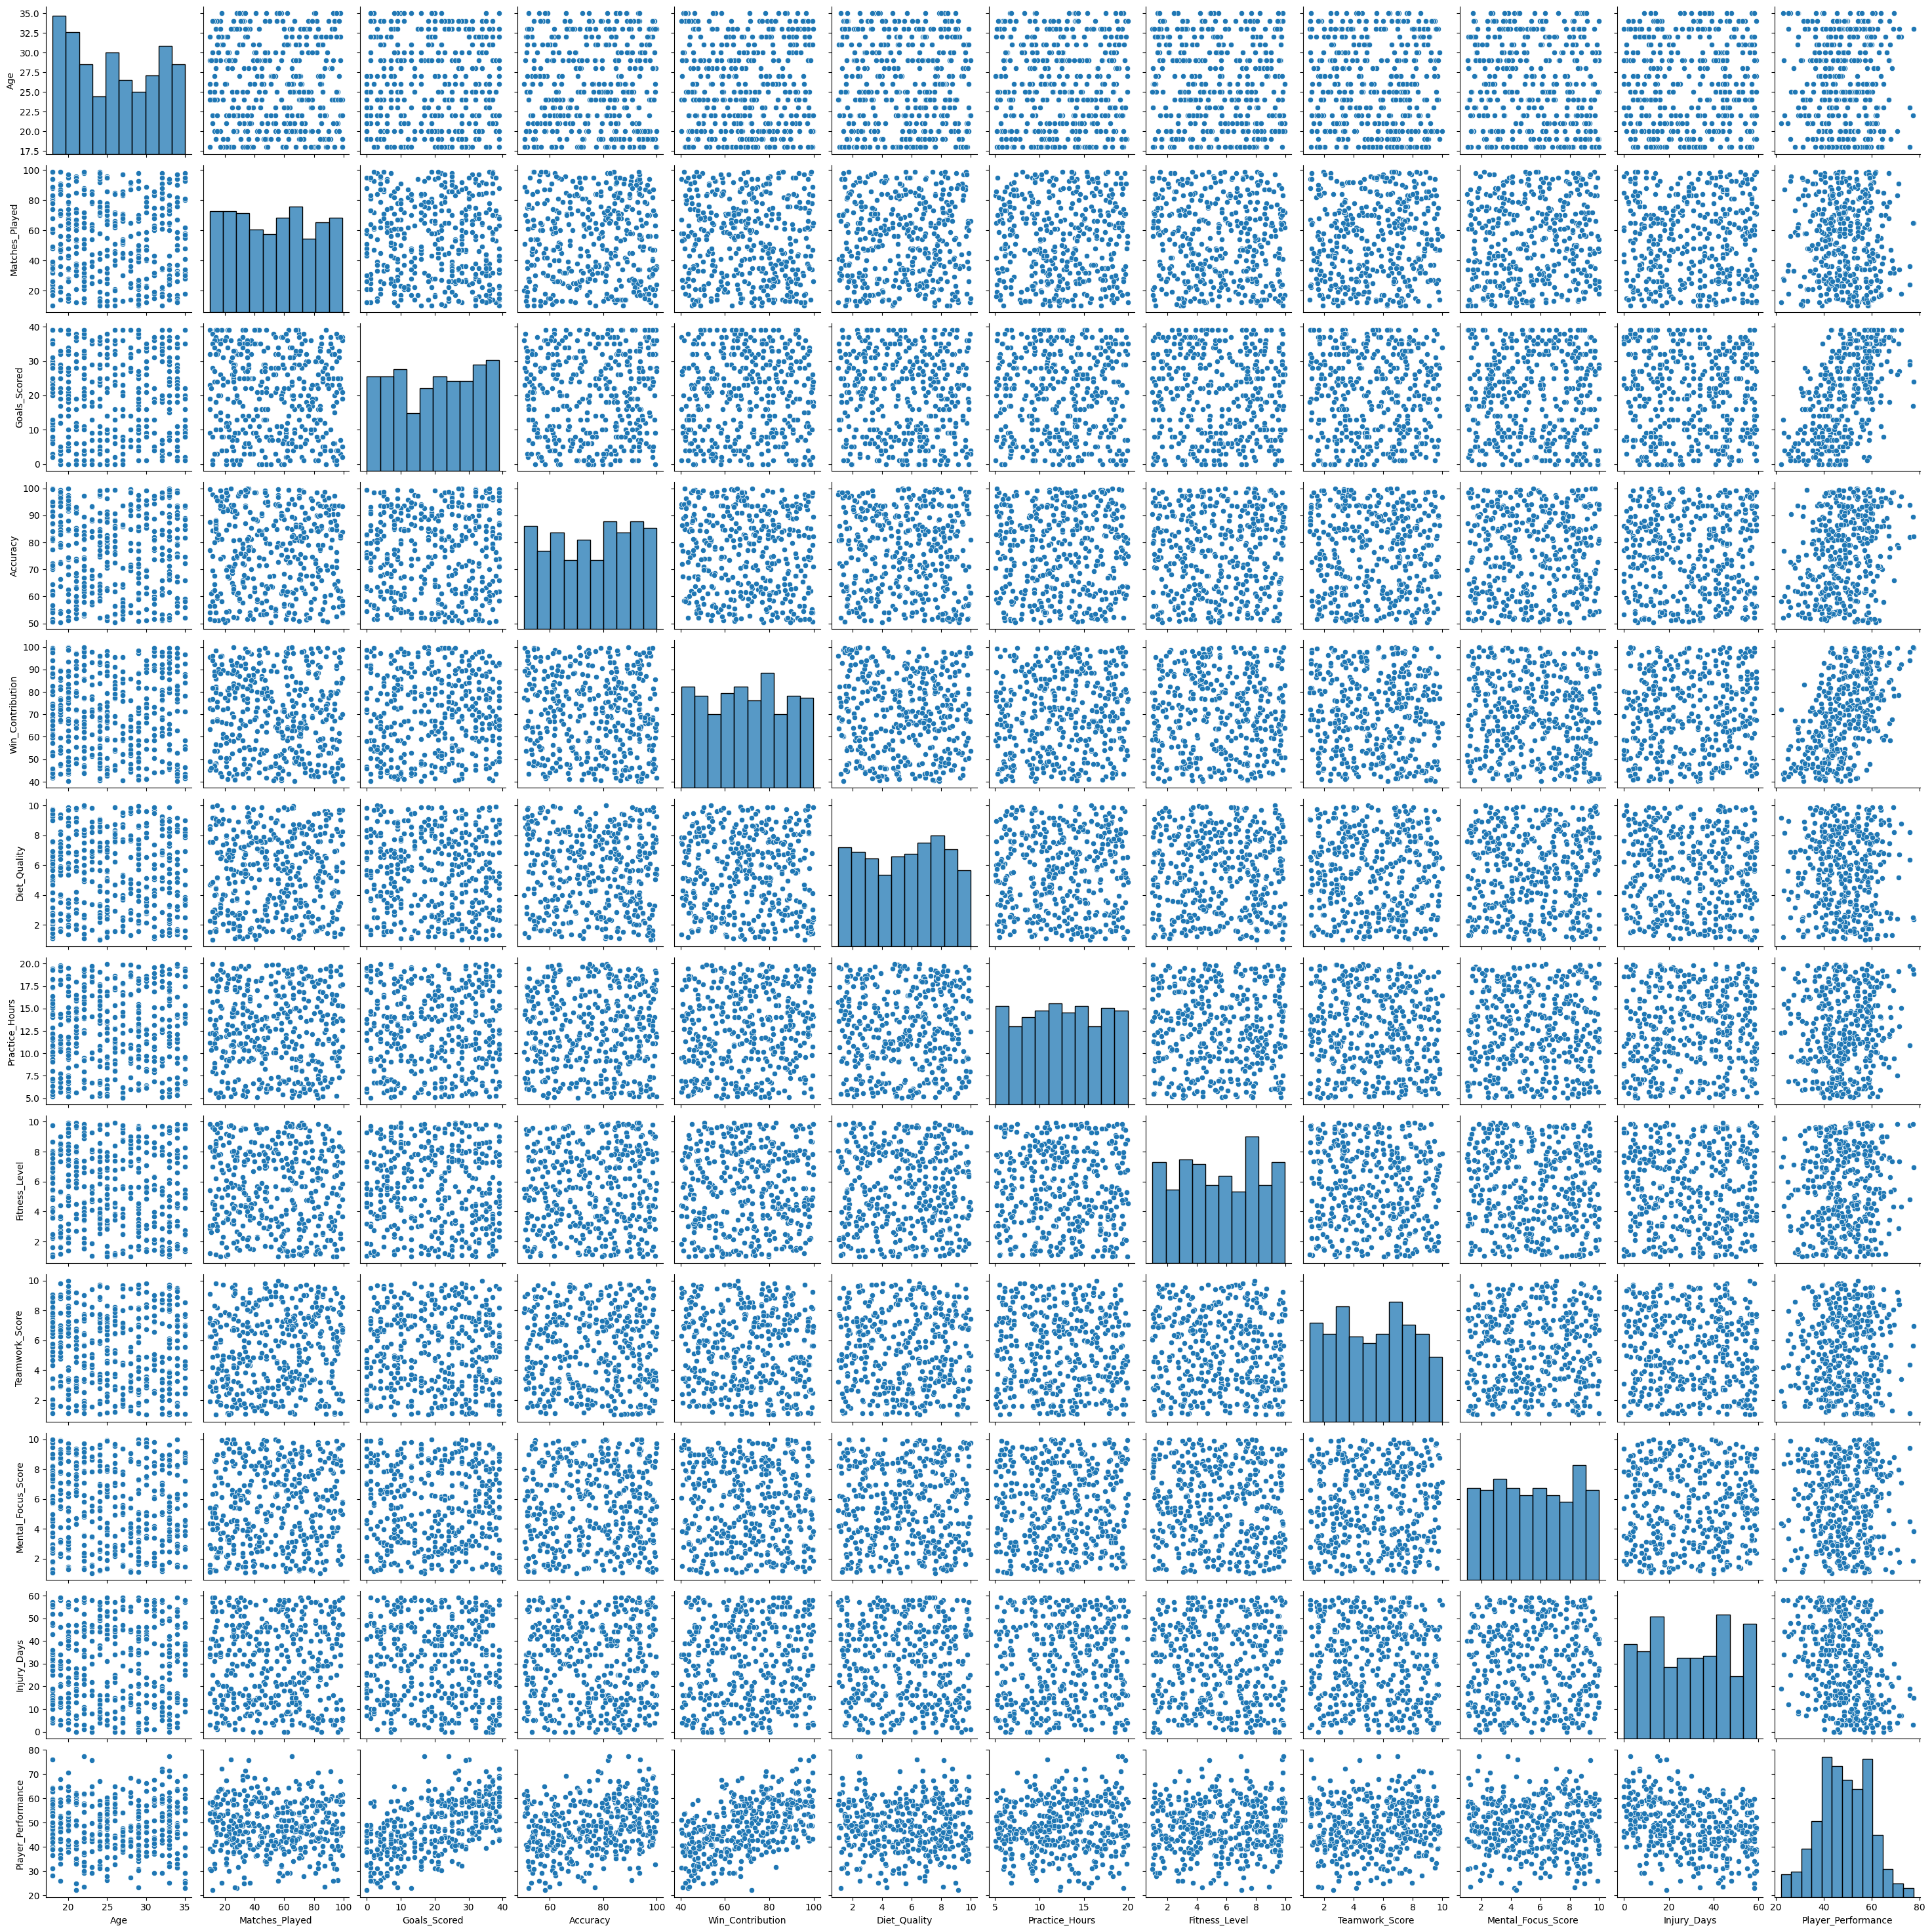

In [6]:
import seaborn as sns
sns.pairplot(df)
plt.show()
df = df.drop('Name',axis='columns')


In [7]:

df.corr()['Player_Performance'].sort_values(ascending=False)


Player_Performance    1.000000
Goals_Scored          0.546522
Win_Contribution      0.542331
Accuracy              0.303876
Practice_Hours        0.078980
Fitness_Level         0.073594
Teamwork_Score        0.060177
Age                   0.011909
Diet_Quality          0.011363
Mental_Focus_Score   -0.012822
Matches_Played       -0.031454
Injury_Days          -0.315670
Name: Player_Performance, dtype: float64

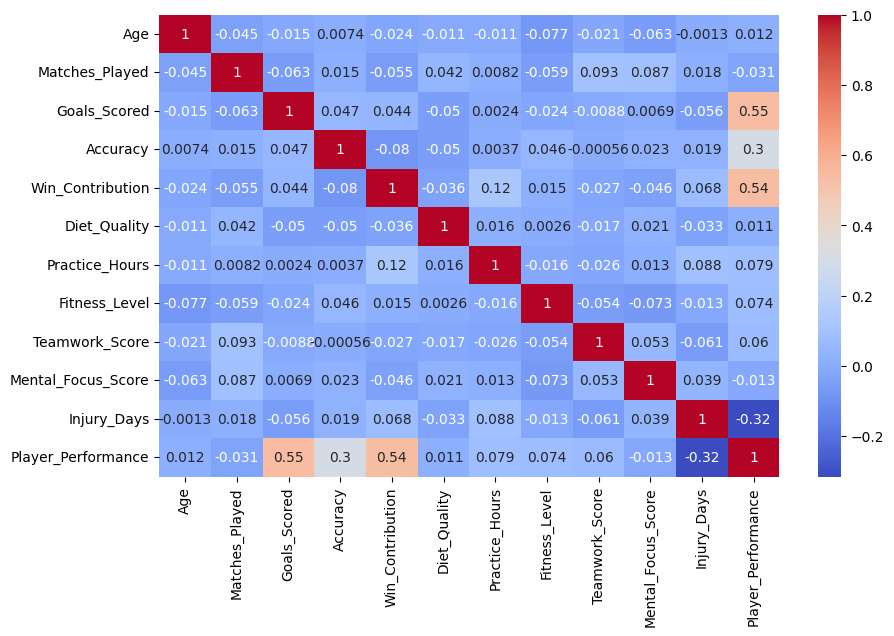

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [9]:
x = df.drop('Player_Performance', axis='columns')
y = df['Player_Performance']
print(x.shape)
print(y.shape)

(400, 11)
(400,)


In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
scale = StandardScaler()
x_train_scale = scale.fit_transform(x_train)
x_test_scale = scale.transform(x_test)

best_featute= SelectKBest(score_func=f_regression, k=5)
x_train_selected = best_featute.fit_transform(x_train_scale, y_train)
x_test_selected = best_featute.transform(x_test_scale)
model = LinearRegression()
model.fit(x_train_selected, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [11]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(x_test_selected)  
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(r2)
print(mse)

0.7890071378913603
29.71066768039746


In [12]:
print(x_train.shape)
y_train.shape

(320, 11)


(320,)

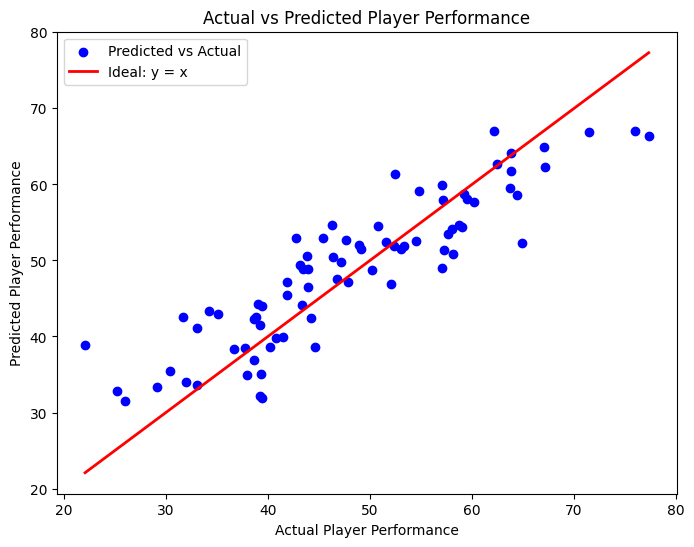

In [14]:
y_pred = model.predict(x_test_selected)

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, c='blue', label='Predicted vs Actual')

mn = min(y_test.min(), y_pred.min())
mx = max(y_test.max(), y_pred.max())
plt.plot([mn, mx], [mn, mx], color='red', linewidth=2, label='Ideal: y = x')

plt.xlabel('Actual Player Performance')
plt.ylabel('Predicted Player Performance')
plt.title('Actual vs Predicted Player Performance')
plt.legend()
plt.show()

In [15]:
import joblib
joblib.dump(model,'model.pkl')
joblib.dump(scale,'scaler.pkl')
joblib.dump(best_featute,'feature_selector.pkl')

['feature_selector.pkl']

In [19]:
print(x.columns)

Index(['Age', 'Matches_Played', 'Goals_Scored', 'Accuracy', 'Win_Contribution',
       'Diet_Quality', 'Practice_Hours', 'Fitness_Level', 'Teamwork_Score',
       'Mental_Focus_Score', 'Injury_Days'],
      dtype='object')
